# Social media ads data

The dataset here analized refere to people who saw an specific ad on social media. The features are:
- User ID
- Gender
- Age
- EstimatedSalary (Salary per year)
- Purchased (If the person finished the purchase, (1: Yes, 0: No))

We want to predict the Purchased feature.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Validation
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold

In [42]:
df= pd.read_csv('https://raw.githubusercontent.com/ricardorocha86/Dados-Redes-Sociais/master/Social_Network_Ads.csv')

In [43]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


**Possible changes**
- Put salary to montly
- See what gender buys more
- See what ages buy more
- Separate ages by gen ?
- Create salary categories ?

**DESCRIPTIVE ANALISYS**

In [44]:
# Delete unnecessary info
df.drop(columns = 'User ID', inplace= True)

In [45]:
#Transforming to monthly salary
df['EstimatedSalary']= (df['EstimatedSalary']/12).round(2) 

In [46]:
df.isnull().sum()
# No missing data (YAY)

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [47]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,5811.875275,0.357500
std,10.482877,2841.413521,0.479864
min,18.000000,1250.000000,0.000000
25%,29.750000,3583.330000,0.000000
50%,37.000000,5833.330000,0.000000
75%,46.000000,7333.330000,1.000000
max,60.000000,12500.000000,1.000000


**Age Analysis**

<AxesSubplot:>

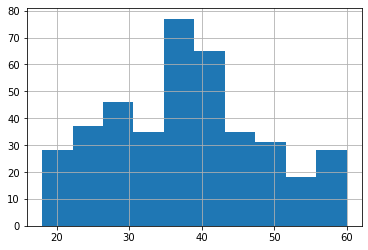

In [48]:
#Age's distribution
df['Age'].hist()

<AxesSubplot:>

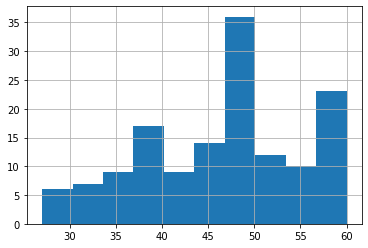

In [49]:
# Age's distribution of those who bought it
df[(df["Purchased"]== 1)]["Age"].hist()

Most purchases come from the oldest people, mostly around 45yo to 60yo

In [50]:
df['Age'].groupby(df['Gender']).mean().round() 

Gender
Female    38.0
Male      37.0
Name: Age, dtype: float64

Average age from men and women has no big difference

<AxesSubplot:xlabel='Age'>

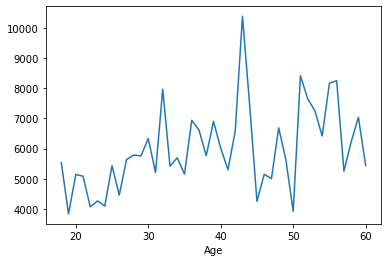

In [51]:
df['EstimatedSalary'].groupby(df['Age']).mean().round().plot()

Highest salaries are for older people, comparing with the age's distribution for those who bought it, it is very similar. So the Salary is probably an important info.

**Gender Analysis**

<AxesSubplot:ylabel='Gender'>

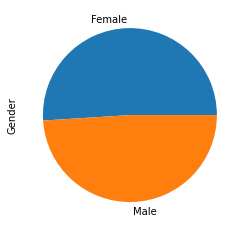

In [52]:
df['Gender'].value_counts().plot(kind = 'pie')
#Almost same quantity of men adn women

In [53]:
df['EstimatedSalary'].groupby(df['Gender']).mean().round()

Gender
Female    5980.0
Male      5637.0
Name: EstimatedSalary, dtype: float64

In general women has higher salaries, but no big difference

In [54]:
#Quantities of men and women who bought the product
df[df['Purchased'] == 1]['Gender'].value_counts()

Female    77
Male      66
Name: Gender, dtype: int64

Women bought more

<AxesSubplot:ylabel='Purchased'>

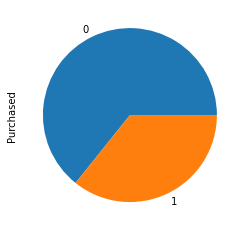

In [55]:
df['Purchased'].value_counts().plot(kind = 'pie')
# Most people who visited didn't buy it

**PREDICTIVE ANALISYS**

In [57]:
# Transform gender in Dummy
df= pd.get_dummies(df, columns= ["Gender"], drop_first= True)

In [58]:
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19.0,1583.33,0,1
1,35.0,1666.67,0,1
2,26.0,3583.33,0,0
3,27.0,4750.00,0,0
4,19.0,6333.33,0,1
...,...,...,...,...
395,46.0,3416.67,1,0
396,51.0,1916.67,1,1
397,50.0,1666.67,1,0
398,36.0,2750.00,0,1


In [65]:
X= df.drop(columns= ["Purchased"]) #Define features
y= df['Purchased'] # Define Target
Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size = 0.25) # Separe df on train and test
val = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2) # Kfold for validation

In [66]:
# Put everything on the same scale
scaler= MinMaxScaler().fit(Xtrain) 
Xtrain_normalized= pd.DataFrame(scaler.transform(Xtrain), columns= Xtrain.columns)
Xtest_normalized= pd.DataFrame(scaler.transform(Xtest), columns= Xtest.columns)

In [67]:
metrics = ['accuracy', # Correct predicted (+TP, +TN)
            'recall', # Detect positive samples (+TP)
           'precision', # Not detect as positive something that's negative (-FP)
           'balanced_accuracy', #Average recall 
           'f1' #Precion & recall]  
# Trying different models
models = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]

models_names = ['Logistic Regression',
                        'Tree (prof = 3)',
                        'Tree (prof = 5)',
                        'Tree (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Random Forest (tree = 50, prof = 5)',
                        'Random Forest (tree = 50, prof = 7)',
                        'Random Forest (tree = 100, prof = 5)', 
                        'Random Forest (tree = 100, prof = 7)']

resultados0 = {}

for i in range(len(models)):

    print('Modelo: ' + models_names[i])

    accs_vc = cross_validate(models[i], Xtrain, ytrain, cv = val, scoring = metrics)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[models_names[i]] = [acc, sen, vpp, bac, f1s]
    
    
resultados = pd.DataFrame(resultados0, index = metrics).T

Modelo: Logistic Regression
Modelo: Tree (prof = 3)
Modelo: Tree (prof = 5)
Modelo: Tree (prof = 7)
Modelo: 5-NN
Modelo: 15-NN
Modelo: 25-NN
Modelo: Random Forest (tree = 50, prof = 5)
Modelo: Random Forest (tree = 50, prof = 7)
Modelo: Random Forest (tree = 100, prof = 5)
Modelo: Random Forest (tree = 100, prof = 7)


In [68]:
resultados.sort_values(by = 'f1', ascending = False)

,accuracy,recall,precision,balanced_accuracy,f1
"Random Forest (tree = 100, prof = 7)",0.903333,0.875909,0.870555,0.897560,0.869240
"Random Forest (tree = 100, prof = 5)",0.903333,0.889545,0.857786,0.900496,0.868719
Tree (prof = 3),0.895000,0.908636,0.836288,0.897937,0.864426
"Random Forest (tree = 50, prof = 7)",0.898333,0.880000,0.855137,0.894079,0.861547
"Random Forest (tree = 50, prof = 5)",0.896667,0.867727,0.860942,0.890640,0.858496
Tree (prof = 5),0.896667,0.835455,0.880909,0.883911,0.853176
Tree (prof = 7),0.893333,0.839545,0.875062,0.881812,0.849555
Logistic Regression,0.843333,0.711818,0.844484,0.815251,0.765925
5-NN,0.820000,0.686818,0.803544,0.791172,0.728955
15-NN,0.796667,0.623182,0.787921,0.759157,0.688334
